In [1]:
from graph import Graph
from johnson import Johnson
from time import sleep, time
from math import log2
import pandas as pd
from random import randint as rint


# items of the dict are {value: t}, where value - is a value of a variable that characterize input volume and t - is a runtime of the algorithm 
time_johnson = {}

# items of the dict are {value: t}, where value - is a value of a variable that characterize input volume and t - is a runtime of the function that sets time-complexity class
time_average = {}

# input compasses (the number of vertices)
_from = 10
_to = 100


for v in range(_from, _to):

    # here the runtimes of the same input volume will be save up due to the following average
    t = []

    # the number of those runtimes
    k = 10

    # here the number of edges is generated
    e_number = rint(v*(v-1)//6, v*(v-1)*2//3)
    
    for _ in range(k):
        # False means that the graph is not empty, then the number of vertices and edges respectively are set at value
        G = Graph(False, v, e_number)
        t1 = time()
        paths = Johnson(G)
        t2 = time() - t1
        t.append(t2)
    # average of the runtime (as previously stated)
    time_johnson[v] = sum(i for i in t)/k

    # the simulate function setting time-complexity class working

    # value of this function for the v
    stop = int(v*v*log2(v)+v*e_number)

    t1 = time()
    for _ in range(stop):
        # here are random actions for increasing time of a fake working
        for i in range(3):
            s = i*(i)+1
            s = log2(s)
    t2 = time() - t1

    time_average[v] = t2



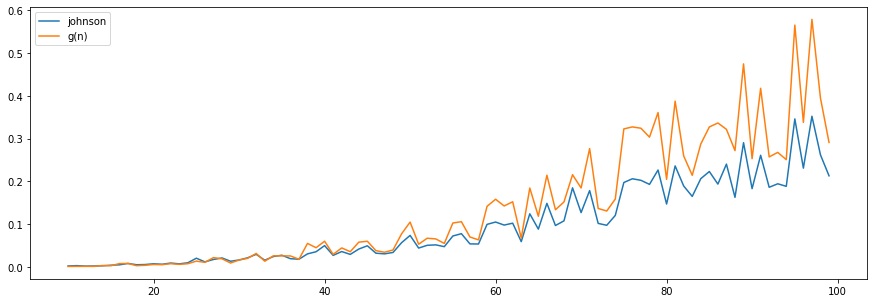

In [2]:
import matplotlib.pyplot as plt


d = {"johnson": pd.Series(time_johnson), "g(n)": pd.Series(time_average)}
df = pd.DataFrame(d)
df.plot(kind='line',figsize=(15,5))
plt.show()

# This line graph shows the ratio of the measured complexity to time-complexity-set-function

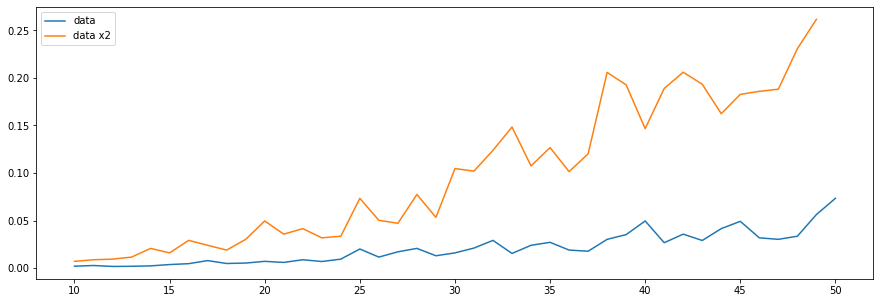

In [3]:
a1 = [time_johnson[i] for i in range(_from, _to//2 + 1)]
a1x2 = [time_johnson[2*i] for i in range(_from, _to//2 )]
d1 = {"data": pd.Series(a1, index=[i+10 for i in range(len(a1))]), "data x2": pd.Series(a1x2,index=[i+10 for i in range(len(a1x2))])}
df1 = pd.DataFrame(d1)
df1.plot(kind='line',figsize=(15,5))
plt.show()

# This line graph shows the ratio of the measured complexities when data is doubled